## Tier 1. Module 2: Mathematics for Computer Science
## Topic 8 - Mathematical statistics
## Homework

### Task 1


Take the simulation code from task 7 of homework for topic 7 “Probability theory. Combinatorics". We will assume that the change in the share price at each moment of time is equal $ x ∼ Г(0.3, 1.1)$, where $ Г $ — notation of the gamma distribution.

It is necessary to run the simulation $ n = 100 $ times for different values of time $ t $.

- Construct a distribution histogram $ x $.
- Run the simulation with $ t $ from 1 to, for example, ~60 in steps of, for example, 1 or 2.

For each $ t $ value, construct a histogram of the price distribution and check it for normality. Draw conclusions about the change in distribution with an increase in $ t $.


In [30]:
import numpy as np


def stock_price_at_time(t: int, gamma: tuple) -> int:
    price = 0
    if t > 0:
        for _ in range(t):
            price += np.random.gamma(*gamma)
    return price


def simulate_n_times(n_simulations: int, t: int, gamma: tuple) -> list:
    prices = []
    for _ in range(n_simulations):
        np.random.seed()
        price = stock_price_at_time(t, gamma)
        prices.append(price)
    return np.array(prices)

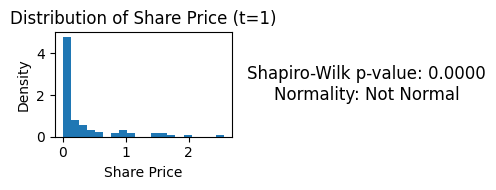

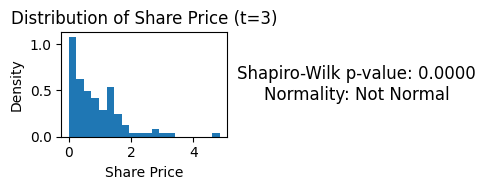

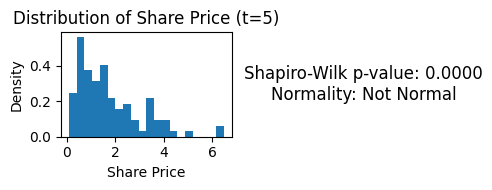

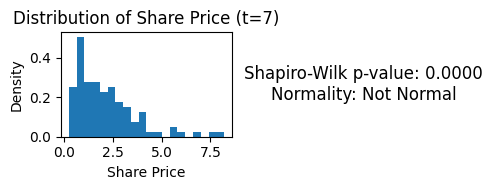

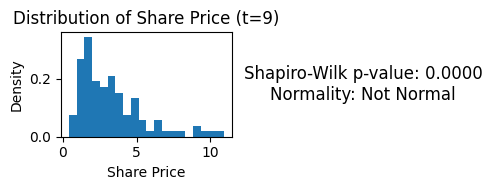

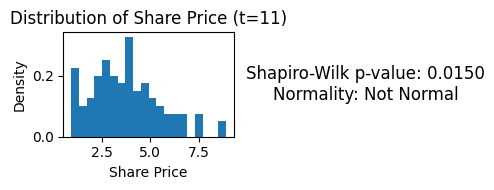

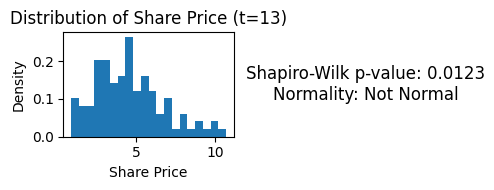

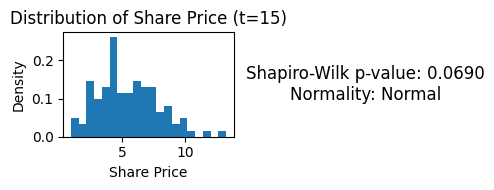

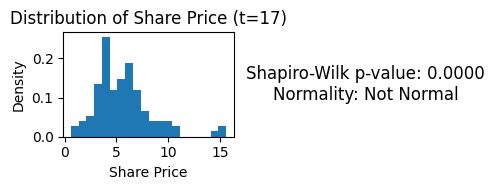

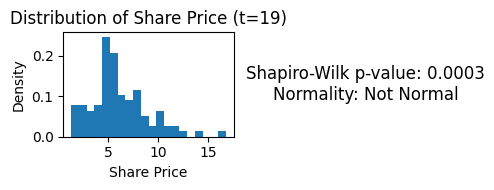

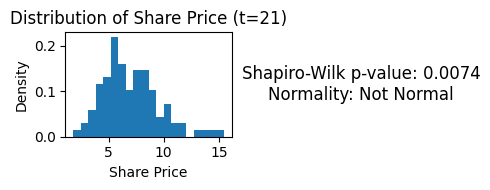

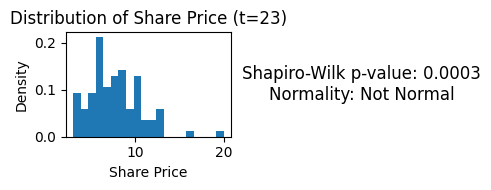

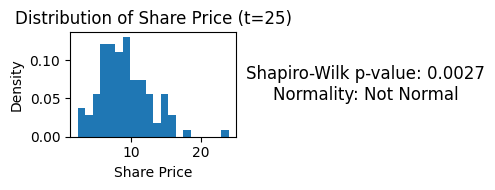

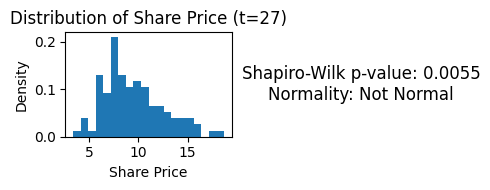

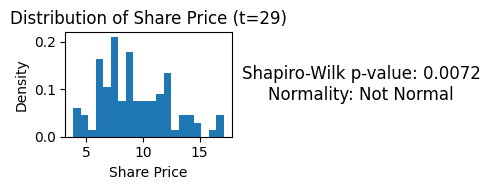

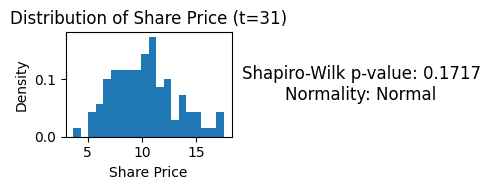

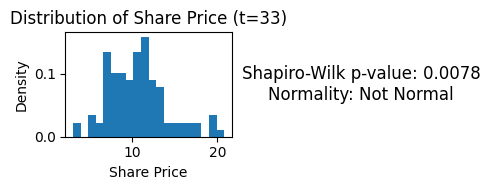

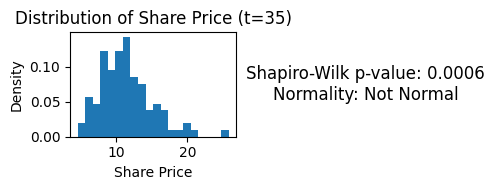

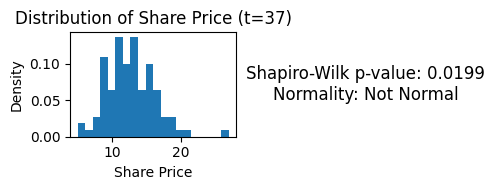

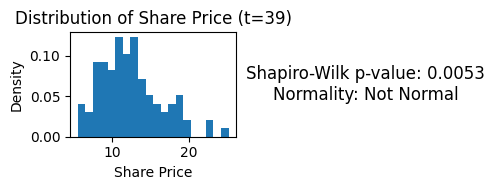

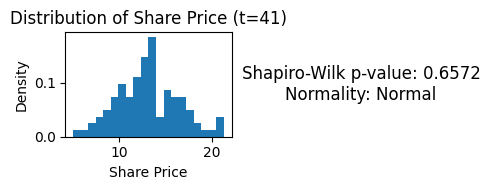

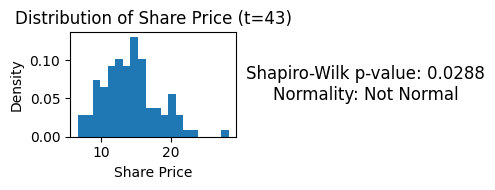

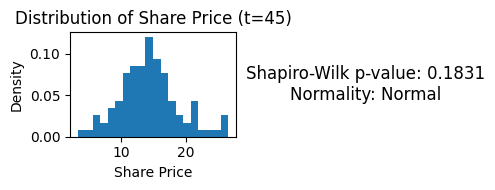

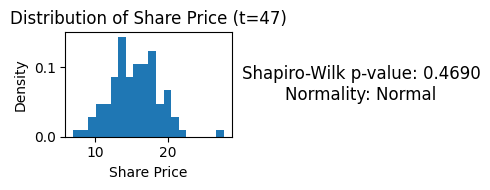

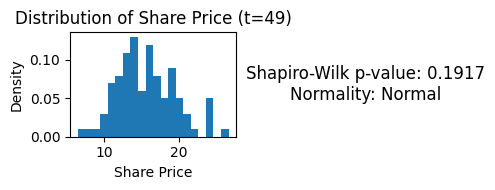

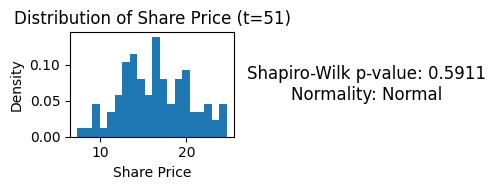

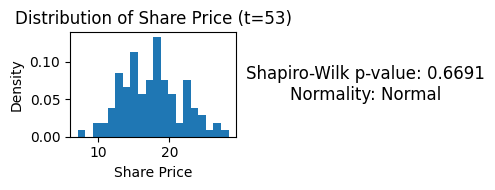

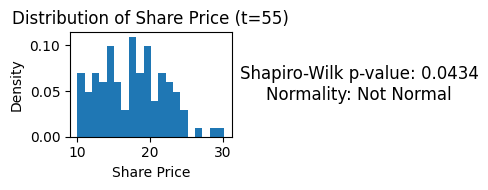

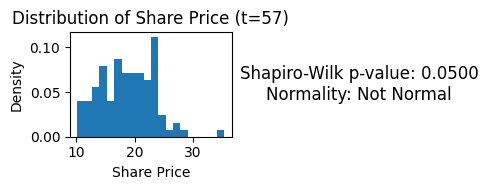

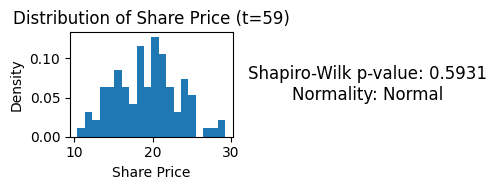

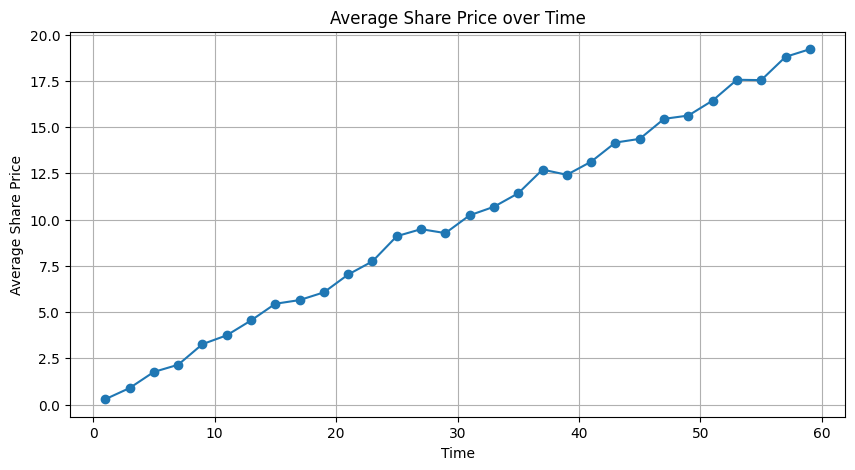

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

n_simulations = 100
sim_time = 60
sim_step = 2
gamma = (0.3, 1.1)


average_prices = []
for t in np.arange(1, sim_time + 1, sim_step):
    # Price simulation
    prices = simulate_n_times(n_simulations, t, gamma)
    average_prices.append(np.mean(prices))

    # Plot histogram of price distribution
    plt.figure(figsize=(5, 2))
    plt.subplot(1, 2, 1)
    plt.hist(prices, bins=20, density=True)
    plt.title(f"Distribution of Share Price (t={t})")
    plt.xlabel("Share Price")
    plt.ylabel("Density")

    # Check for normality
    shapiro_stat, shapiro_p = shapiro(prices)
    if shapiro_p > 0.05:
        normality_result = "Normal"
    else:
        normality_result = "Not Normal"
    plt.subplot(1, 2, 2)
    plt.text(
        0.5,
        0.5,
        f"Shapiro-Wilk p-value: {shapiro_p:.4f}\nNormality: {normality_result}",
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=12,
    )
    plt.axis("off")
    plt.tight_layout()
    plt.show()


# Plot average share price over time
plt.figure(figsize=(10, 5))
plt.plot(
    np.arange(1, sim_time + 1, sim_step), average_prices, marker="o", linestyle="-"
)
plt.title("Average Share Price over Time")
plt.xlabel("Time")
plt.ylabel("Average Share Price")
plt.grid(True)
plt.show()

#### Conclusion:
As time increases, the price distribution tends toward normal.

### Task 2


Download [Product Promotion Dataset](https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit?usp=sharing). The data set consists of seven columns that represent ad spend across different platforms — television, billboards, Google Ads, social media, influencer marketing, and affiliate marketing.

The last column "Product_Sold" contains a quantification of the corresponding number of units of the product sold. For each column, calculate the mean, variance, standard deviation, construct a histogram of the distribution of the measure, test the distribution for normality, and calculate the correlation with Product_Sold.

#### Loading data


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit?usp=sharing"
url = url[: url.find("/edit")] + "/export?format=csv"

df = pd.read_csv(url)

In [35]:
df

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0
...,...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56,6851.0
296,512.38,250.83,373.78,366.95,987.14,509.03,6477.0
297,998.10,858.75,781.06,60.61,174.63,213.53,6949.0
298,322.35,681.22,640.29,343.65,534.22,648.71,7737.0


#### 2.1 - Mean values

In [9]:
df.mean()

TV                       517.431000
Billboards               502.644933
Google_Ads               512.444133
Social_Media             489.800100
Influencer_Marketing     465.732567
Affiliate_Marketing      484.430633
Product_Sold            7031.523333
dtype: float64

#### 2.2 - Variance

In [10]:
df.var()

TV                      8.301013e+04
Billboards              7.608901e+04
Google_Ads              8.146593e+04
Social_Media            7.501240e+04
Influencer_Marketing    8.312501e+04
Affiliate_Marketing     7.725924e+04
Product_Sold            2.902304e+06
dtype: float64

#### 2.3 - Standard deviation

In [11]:
df.std()

TV                       288.114792
Billboards               275.842369
Google_Ads               285.422376
Social_Media             273.883915
Influencer_Marketing     288.314080
Affiliate_Marketing      277.955458
Product_Sold            1703.614951
dtype: float64

#### 2.4 - Distribution histograms

C:\Users\danie\AppData\Local\Temp\ipykernel_27352\2016394633.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


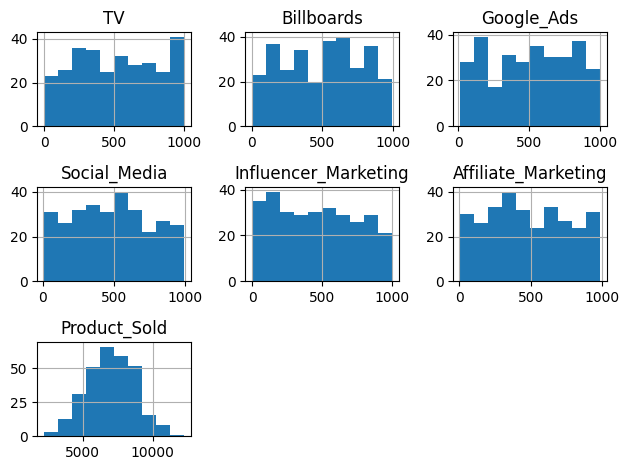

In [13]:
fig, ax = plt.subplots()
df.hist(ax=ax)
fig.tight_layout()
plt.show()

#### 2.5 - Checking the distribution for normality

In [36]:
from scipy.stats import shapiro

for column in df.columns:
    data = df[column]
    shapiro_stat, shapiro_p = shapiro(data)
    print(f"Column: {column}")
    if shapiro_p > 0.05:
        normality_result = "Normal"
    else:
        normality_result = "Not Normal"
    print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}\nNormality: {normality_result}\n")

Column: TV
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Billboards
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Google_Ads
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Social_Media
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Influencer_Marketing
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Affiliate_Marketing
Shapiro-Wilk p-value: 0.0000
Normality: Not Normal

Column: Product_Sold
Shapiro-Wilk p-value: 0.7863
Normality: Normal



#### 2.6 - Column correlation with Product_Sold

In [26]:
df.corr()[-1:]

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.0


<Axes: >

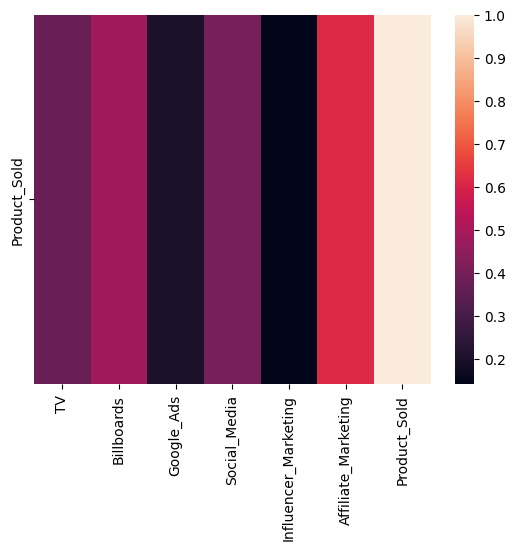

In [27]:
sns.heatmap(df.corr()[-1:])